# A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in 
Keras to solve this and check the accuracy scores.

Dataset to be used: keras.datasets.fashion_mnist

# Load tensorflow

In [2]:
import warnings
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'2.0.0-alpha0'

# Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX,testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
testY.shape

(10000,)

In [8]:
testY.view()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Convert both training and testing labels into one-hot vectors.

Hint: check tf.keras.utils.to_categorical()

In [9]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

Expected output should look like

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Visualize the data
Plot first 10 images in the triaining set and their labels.

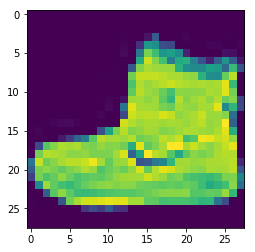

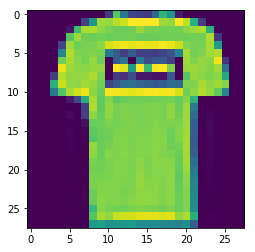

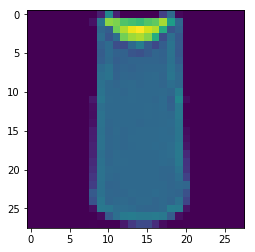

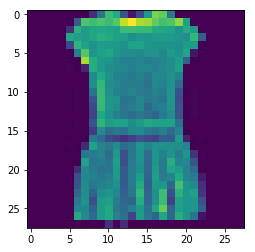

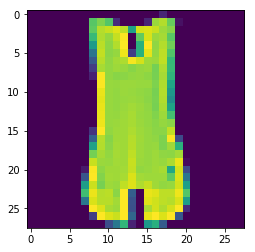

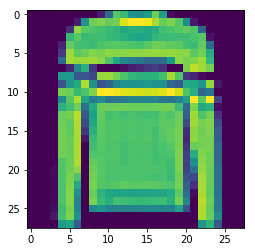

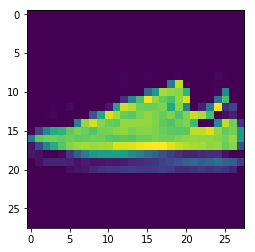

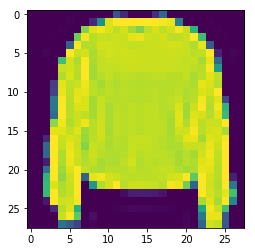

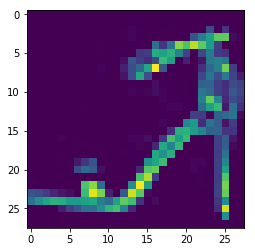

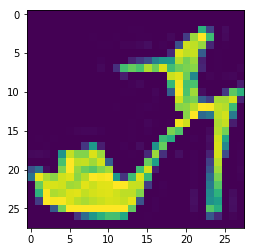

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    image = trainX[i]
    plt.figure(i)
    plt.imshow(image)

# Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
#Initialize sequenial model
model = tf.keras.models.Sequential()

In [13]:
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [14]:
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [15]:
#compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

# Execute the model using model.fit()

In [16]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 174.7006 - accuracy: 0.0729 - val_loss: 566.4906 - val_accuracy: 0.1503
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: 564.6057 - accuracy: 0.1485 - val_loss: 983.8566 - val_accuracy: 0.2168
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 976.4285 - accuracy: 0.2157 - val_loss: 1364.3582 - val_accuracy: 0.3434
Epoch 4/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1354.0167 - accuracy: 0.3428 - val_loss: 1351.4517 - val_accuracy: 0.2384
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 1345.5820 - accuracy: 0.2383 - val_loss: 1164.7896 - val_accuracy: 0.3596
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 1156.4158 - accuracy: 0.3599 - val_loss: 1099.1923 - val_accuracy: 0.3429
Epoch 7/10
60000/60000 [====

# In the above Neural network model add Batch Normalization layer after the input layer and repeat the steps

In [17]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [18]:
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [19]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [20]:
# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [21]:
#compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.9318 - accuracy: 0.6780 - val_loss: 0.6980 - val_accuracy: 0.7614
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6420 - accuracy: 0.7798 - val_loss: 0.6215 - val_accuracy: 0.7927
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5845 - accuracy: 0.7983 - val_loss: 0.5743 - val_accuracy: 0.8075
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5554 - accuracy: 0.8092 - val_loss: 0.5603 - val_accuracy: 0.8110
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5384 - accuracy: 0.8154 - val_loss: 0.5436 - val_accuracy: 0.8184
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5268 - accuracy: 0.8199 - val_loss: 0.5312 - val_accuracy: 0.8211
Epoch 7/10
60000/60000 [==============================

# Customize the learning rate to 0.001 in sgd optimizer and run the model

In [23]:
#Initialize the sequential model
model=tf.keras.models.Sequential()

In [24]:
#Reshape the data from 2D to 1D -> 28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [25]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [26]:
# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [27]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.9081 - accuracy: 0.6905 - val_loss: 0.7041 - val_accuracy: 0.7683
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6443 - accuracy: 0.7803 - val_loss: 0.6276 - val_accuracy: 0.7927
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5921 - accuracy: 0.7987 - val_loss: 0.5915 - val_accuracy: 0.8046
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5628 - accuracy: 0.8069 - val_loss: 0.5572 - val_accuracy: 0.8096
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5426 - accuracy: 0.8150 - val_loss: 0.5474 - val_accuracy: 0.8142
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5303 - accuracy: 0.8166 - val_loss: 0.5369 - val_accuracy: 0.8188
Epoch 7/10
60000/60000 [==============================

# Build the Neural Network model with 3 Dense layers with 100,100(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [29]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [30]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [31]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [32]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [33]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [34]:
#Add Dense Layer which provides 100 hidden neurons for 2nd layer with sigmoid
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

In [35]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [36]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [37]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/sample - loss: 2.3010 - accuracy: 0.1159 - val_loss: 2.2975 - val_accuracy: 0.1758
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 2.2843 - accuracy: 0.1952 - val_loss: 2.2390 - val_accuracy: 0.2041
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 1.9996 - accuracy: 0.2075 - val_loss: 1.8015 - val_accuracy: 0.2307
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 1.7513 - accuracy: 0.2351 - val_loss: 1.7052 - val_accuracy: 0.2429
Epoch 5/10
60000/60000 [==============================] - 8s 140us/sample - loss: 1.6860 - accuracy: 0.2723 - val_loss: 1.6541 - val_accuracy: 0.2947
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 1.6332 - accuracy: 0.3289 - val_loss: 1.6002 - val_accuracy: 0.3590
Epoch 7/10
60000/60000 [==========================

# Review Model

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               